In [15]:
import numpy as np
import scipy as sc
import scipy.stats as st
import matplotlib.pyplot as plt  # graficación
import seaborn as sns
np.random.seed(1145)  

import warnings
warnings.filterwarnings('ignore')

Escribe un codigo en Python para simular lanzamientos de una moneda en la computadora. Se debe permitir que el usuario
elija parametro 0 < p < 1 que indica la probabilidad de obtener un exito en el lanzamiento de la moneda. Hacer lo siguiente:
a. Obtener, mediante repeticiones, una estimaci´on de la densidad del numero de lanzamientos necesarios para obtener el
primer exito. Por ejemplo, simular un experimento de estos N veces. Usar N = 1000.


probabilidad ingresada...


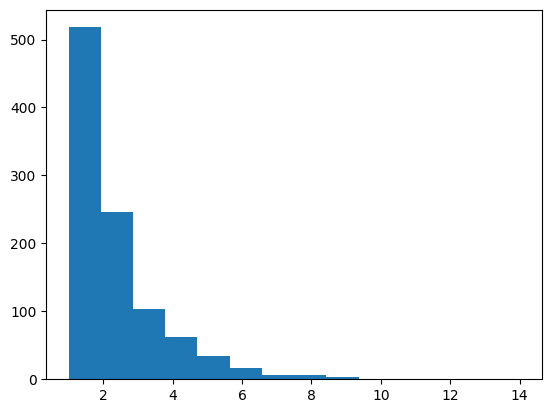

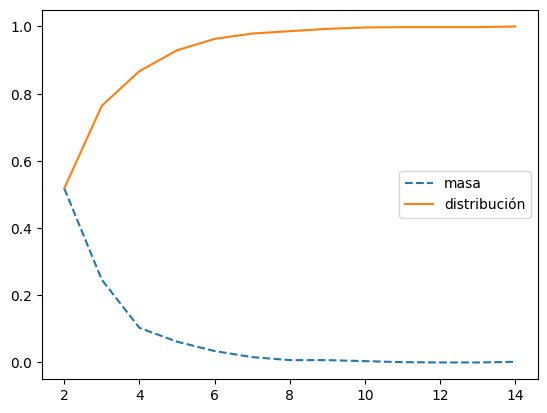

In [16]:


def exito_monedas(prob, n):
    if prob >= 0 and prob <= 1:
        print("probabilidad ingresada...")
        
        sample = np.random.geometric(prob, n)
        bns = sample.max()-sample.min()+1
        plt.figure()
        plt.hist(sample, bins=bns)
        plt.show()
        
        bins = np.arange(sample.min(), sample.max()+1)
        x,y = np.histogram(sample, bins)
        
        plt.figure()
        plt.plot(y[1:], x/n, '--', label="masa" )
        plt.plot(y[1:], x.cumsum()/n, '-', label="distribución")
        plt.legend()
        plt.show()
    


prob = float(input("Ingrese un numero de probabilidad menor a 1 y mayor a 0"))

n= 1000

exito_monedas(prob, n)
    

b. Elaborar 3 visualizaciones de la funci´on de densidad o masa, y cambiando los valores de p.


Probabilidad = 0.6
N = 10000

probabilidad ingresada...


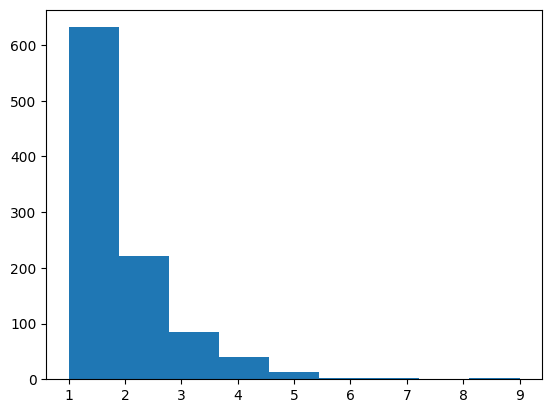

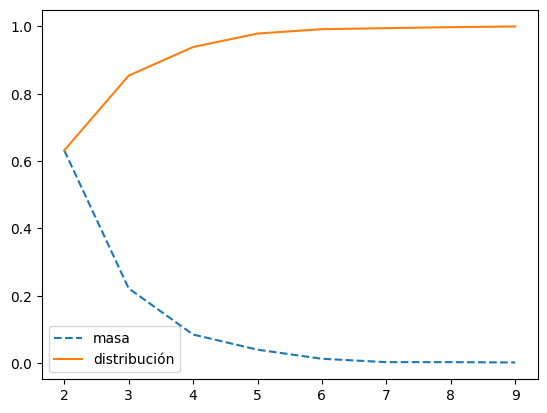

In [17]:
exito_monedas(0.6, 1000)

Probabilidad = 0.4
N = 10000

probabilidad ingresada...


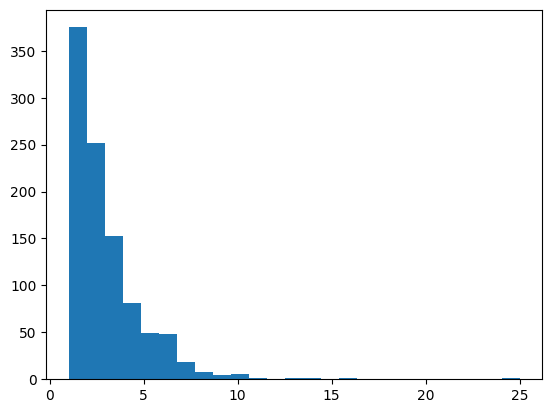

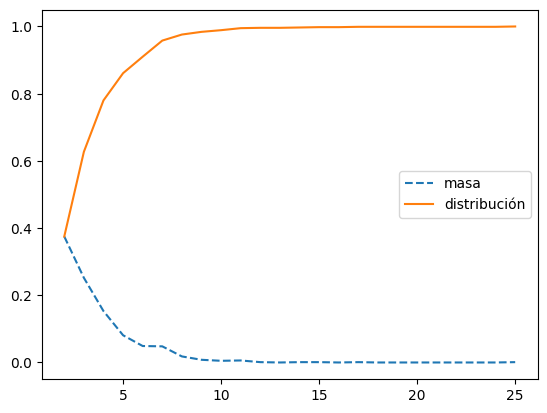

In [18]:
exito_monedas(0.4, 1000)

Probabilidad = 0.3
N = 10000

probabilidad ingresada...


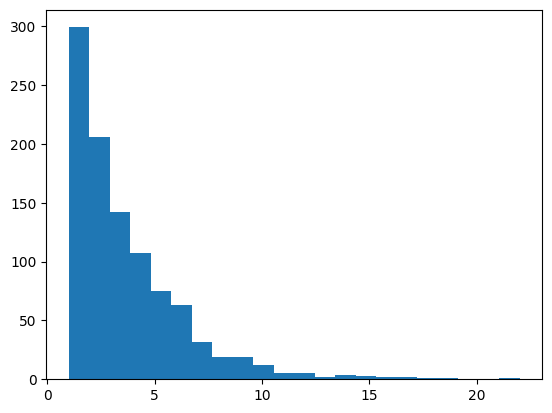

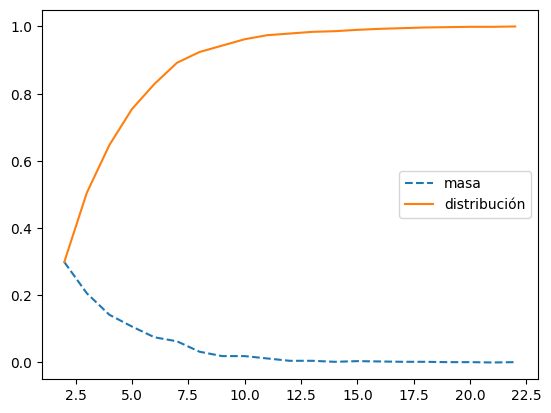

In [19]:
exito_monedas(0.3, 1000)

4. Generar una muestra aleatoria de una distribución gaussiana multivariada de dimensión n (con n ≥ 4), con una media µ ∈ R^n
y covarianza Σ ∈ R^n×n especificadas por el usuario.
A partir de la muestra, graficar un pairplot que permita visualizar todas las densidades de cada variable y todas las nubes
de puntos o densidades bivariadas entre pares de variables.

Calcular el vector de medias y la covarianza de la muestra aleatoria y verificar que son similares a la media y covarianza
te´oricas especificadas.

Vector de medias dadas por usuario

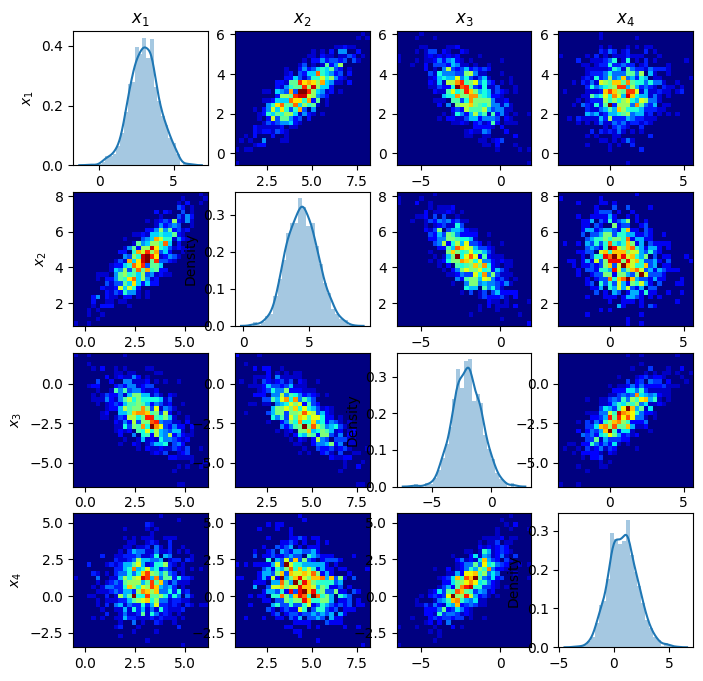

In [20]:
n = 1000
mu = np.array([1.5, 2.0, -0.5, 0.8])
d = 4


sigmab = np.array([
    [1.0,  0.5, -0.3,  0.2],
    [0.5,  1.0, -0.4, -0.1],
    [-0.3, -0.4,  1.0,  0.6],
    [0.2, -0.1,  0.6,  1.0]
])


data = np.random.multivariate_normal(mu, sigmab, n)

np.linalg.eig(sigmab)

L = np.linalg.cholesky(sigmab).T

(L.T)@L


x = mu + (data @ L)


plt.figure(figsize=(8,8))
for i in range(0, d):
    for j in range(0, d):
        plt.subplot(d, d, d*i+j+1)
        if (i==j):
            sns.distplot(x[:,i], kde=True)
        else:
            plt.hist2d(x[:,j], x[:,i], bins=(30,30), cmap=plt.cm.jet)
        if (j==0):
            plt.ylabel(r'$x_{}$'.format(i+1))
        if (i==0):
            plt.title(r'$x_{}$'.format(j+1))
plt.show()




Vector de Medias

In [21]:
x.mean(axis=0)

array([ 3.02282902,  4.48202134, -2.00670209,  0.84043214])

Covarianza

In [22]:
covarianza = np.corrcoef(x.T)
np.round(covarianza, 4)

array([[ 1.    ,  0.7879, -0.5844,  0.0375],
       [ 0.7879,  1.    , -0.7282, -0.2409],
       [-0.5844, -0.7282,  1.    ,  0.7265],
       [ 0.0375, -0.2409,  0.7265,  1.    ]])

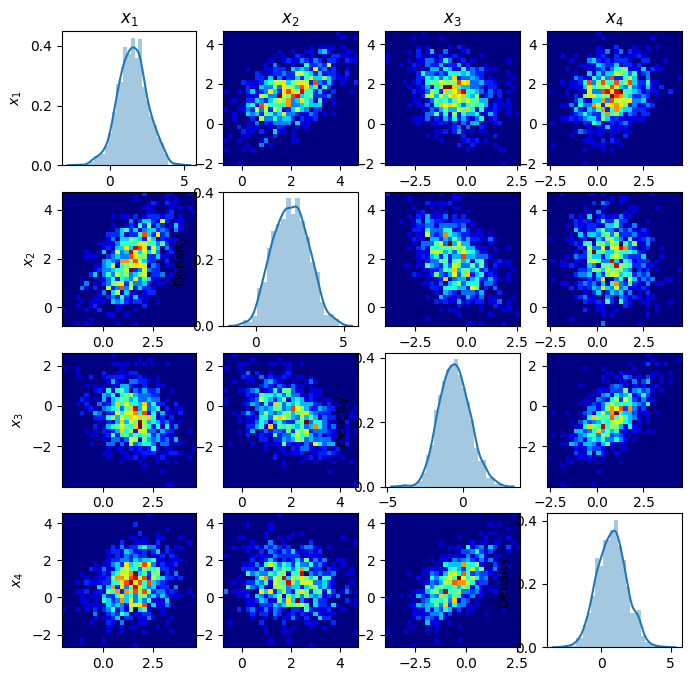

In [23]:
plt.figure(figsize=(8,8))
for i in range(0, d):
    for j in range(0, d):
        plt.subplot(d, d, d*i+j+1)
        if (i==j):
            sns.distplot(data[:,i], kde=True)
        else:
            plt.hist2d(data[:,j], data[:,i], bins=(30,30), cmap=plt.cm.jet)
        if (j==0):
            plt.ylabel(r'$x_{}$'.format(i+1))
        if (i==0):
            plt.title(r'$x_{}$'.format(j+1))
plt.show()